# Analisi tecnica

L'analisi tecnica consiste nella ricerca di regolarità dei mercati per cercare prevederne l'andamento (un po' ciò che accade con il machine learning). <br>
L'approccio di analisi più semplice e diffuso è quello dell'incrocio delle medie mobili.

### Medie mobili semplici ed esponenziali (MACD)

__RICORDA__: una media mobile calcolata su una serie temporale è una nuova serie temporale in cui ciascun valore è calcolato attraverso la media di tot valori precedenti della serie di partenza. 

Fonte: https://www.youtube.com/watch?v=7_dxjNx2PdE&list=PLLDx60G0MrKZ66gCSCM0wvBYKfIXzv7GA&index=3&ab_channel=Pythonenthusiast

L'acronimo MACD significa Moving Averages Convergence Divergence.<br>
Si tratta forse della strategia più utilizzata dagli analisti e prevede di generare segnali all'incrocio tra due medie mobili (doppio crossover); vengono utilizzate due medie, ovviamente di periodo differente. <br>
Quando quella più veloce, ovvero generata da un periodo minore, incrocerà al rialzo quella più lenta verrà generato un segnale di acquisto; viceversa quando quella lenta sarà tagliata al ribasso da quella più veloce si avrà la vendita.<br>
Anche qui i periodi scelti per la creazione delle medie mobili avranno effetto sui segnali generati: se si vorrà seguire andamenti di maggiore respiro sarà necessario aumentare i periodi delle due medie mobili, mentre se si vorranno cavalcare i movimenti di breve periodo si potranno utilizzare due medie mobili più veloci. <br>

__PER CAPIRE__: una media mobile su lungo periodo (ad esempio 1 anno) è molto più "liscia" di una media mobile su breve periodo (ad esempio 1 settimana); questo perché la media mobile a lungo periodo cattura i trend a lungo termine ed è quindi poco sensibile ai piccoli sbalzi che avvengono su periodi contenuti.

__PER CAPIRE__: quando la media mobile a breve periodo taglia quella lunga dal basso all'alto bisogna comprare; quando la media mobile a breve periodo taglia quella lunga dall'alto al basso allora bisogna vendere.

Un altro concetto importante è legato alla modalità di calcolo della media mobile: è possibile calcolare la media mobile come una media aritmetica classica, configurando così quella che si chiama "_media mobile semplice_", oppure è possibile calcolarla come una media pesata con pesi a distribuzione esponenziale, configurando così quella che si chiama "_media mobile esponenziale_". <br>
La media mobile esponenziale è calcolata facendo in modo che i dati più recenti abbiano peso maggiore rispetto a quelli più vecchi; come suggerisce il nome, la distribuzione dei pesi (dai dati più vecchi ai più recenti) segue un andamento esponenziale.

In [206]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import numpy as np

style.use('ggplot')

start = dt.datetime(2014, 5,31)
end = dt.datetime(2024,5, 21)
ticker = 'AAPL'
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])

[*********************100%%**********************]  1 of 1 completed


Creiamo le due serie di medie mobili, una a 20 giorni (1 mese circa) una a 120 giorni (6 mesi circa)

In [207]:
data['SMA20'] = data['Adj Close'].rolling(20).mean() # SMA20 simple moving average a 20 giorni
data['SMA120'] = data['Adj Close'].rolling(120).mean()# SMA120 simple moving average a 120 giorni

In [208]:
data.head(21)

,Adj Close,Volume,SMA20,SMA120
Date,,,,
2014-06-02,19.859394,369350800,NaN,NaN
2014-06-03,20.140232,292709200,NaN,NaN
2014-06-04,20.370216,335482000,NaN,NaN
2014-06-05,20.450140,303805600,NaN,NaN
2014-06-06,20.393906,349938400,NaN,NaN
2014-06-09,20.720234,301660000,NaN,NaN
2014-06-10,20.841860,251108000,NaN,NaN
2014-06-11,20.755621,182724000,NaN,NaN
2014-06-12,20.408438,218996000,NaN,NaN


In [209]:
data.tail()

,Adj Close,Volume,SMA20,SMA120
Date,,,,
2024-05-14,187.429993,52393600,174.736253,181.770830
2024-05-15,189.720001,70400000,175.833630,181.767337
2024-05-16,189.839996,52845200,176.984943,181.759275
2024-05-17,189.869995,41282900,178.239618,181.762601
2024-05-20,191.039993,44361300,179.510850,181.777173


Grafico della serie originale e delle due medie mobili

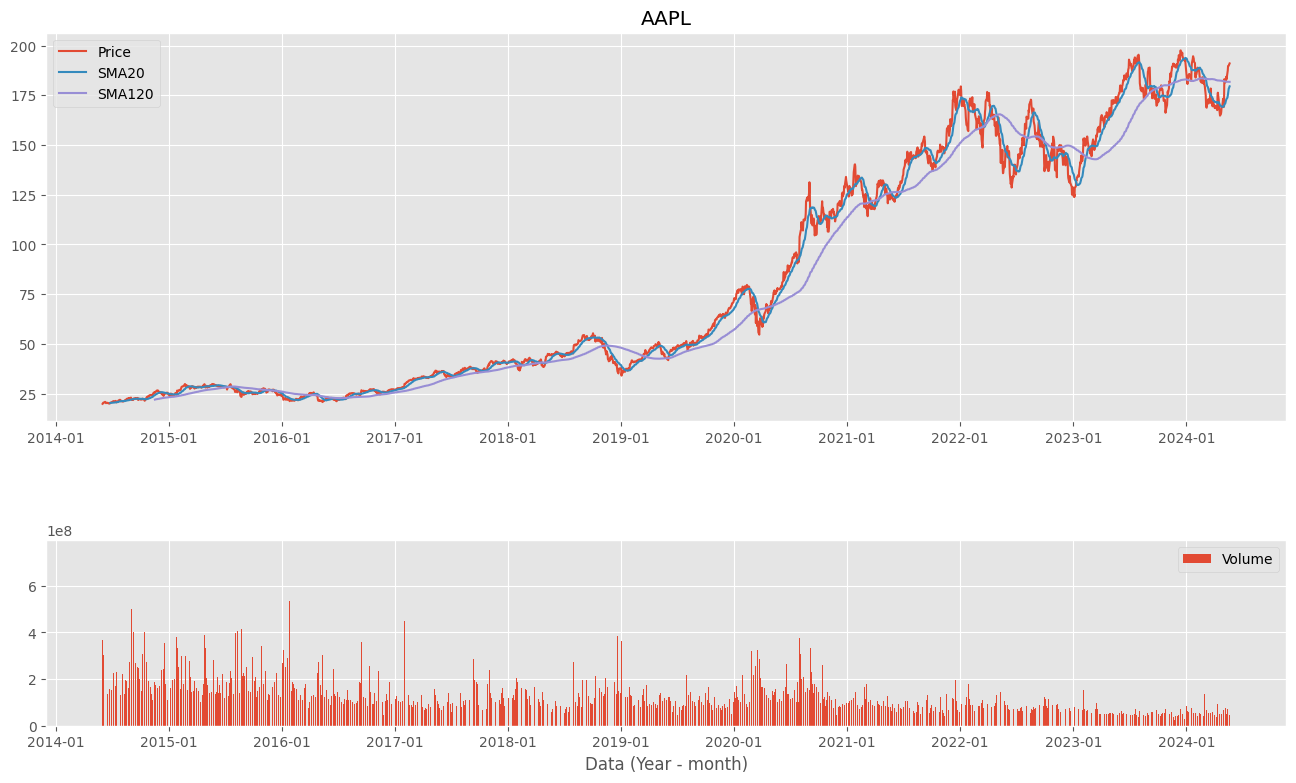

In [210]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')

ax2.bar(data.index, data['Volume'], label = 'Volume')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.set_xlabel('Data (Year - month)')
ax1.legend()
ax2.legend();

Ora creiamo la strategia. <br>
Per prima cosa creiamo una nuova colonna contenente il prezzo del giorno precedente ed una nuova colonna contenente il rapporto tra il prezzo del giorno corrente e quello del giorno precedente; successivamente aggiungiamo una nuova colonna contenente 1 se la media mobile a 20 giorni sta sopra a quella a 120 giorni, 0 altrimenti.

In [211]:
data['Price_yesterday'] = data['Adj Close'].shift(1)
data['Change'] = data['Adj Close'] / data['Price_yesterday']
data['Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]

Vediamo qual è il rendimento della strategia. <br>
Creiamo un nuovo DataFrame che considera soltanto i giorni in cui la media mobile a 20 giorni è rimasta sopra a quella a 120 giorni: in questo nuovo DataFrame saranno presenti soltanto i dati relativi ai giorni in cui siamo investiti, cioè possediamo il titolo.

In [212]:
sma = data[data['Invested_SMA'] == 1].copy()

In [213]:
sma.head()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA
Date,,,,,,,
2014-11-18,25.772600,176896000,24.249850,21.972352,25.442268,1.012984,1
2014-11-19,25.594040,167476800,24.385160,22.020141,25.772600,0.993072,1
2014-11-20,25.960089,173582000,24.518326,22.068640,25.594040,1.014302,1
2014-11-21,25.995796,228717200,24.648944,22.115520,25.960089,1.001375,1
2014-11-24,26.477907,189803200,24.804890,22.165751,25.995796,1.018546,1


In [214]:
sma.loc[:,'Return'] = np.cumprod(sma['Change']) # calcola il rendimento cumulato della strategia

In [215]:
sma.head() # in change ci sono i cambiamenti dal giorno prima a quello dopo, in return i ritorni composti dalla prima riga fino a quella corrente

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA,Return
Date,,,,,,,,
2014-11-18,25.772600,176896000,24.249850,21.972352,25.442268,1.012984,1,1.012984
2014-11-19,25.594040,167476800,24.385160,22.020141,25.772600,0.993072,1,1.005965
2014-11-20,25.960089,173582000,24.518326,22.068640,25.594040,1.014302,1,1.020353
2014-11-21,25.995796,228717200,24.648944,22.115520,25.960089,1.001375,1,1.021756
2014-11-24,26.477907,189803200,24.804890,22.165751,25.995796,1.018546,1,1.040705


In [216]:
sma.loc[:,'rtn'] =sma['Return'].pct_change()
sma['rtn']

Date
2014-11-18         NaN
2014-11-19   -0.006928
2014-11-20    0.014302
2014-11-21    0.001375
2014-11-24    0.018546
                ...   
2024-02-27    0.008114
2024-02-28   -0.006625
2024-02-29   -0.003693
2024-03-01   -0.006030
2024-03-04   -0.025381
Name: rtn, Length: 1729, dtype: float64

In [217]:
sma['rtn'].mean()*252 # calcolo il rendimento medio annuo della strategia (lo fa con media aritmetica, che schifo)

0.21383208078492635

In [218]:
sma['rtn'].std()*np.sqrt(252) # calcolo la deviazione standard media annua della strategia

0.2702614125326169

__NB__: per avere il ritorno composto devo togliere al ritorno (calcolato con media aritmetica) la metà della varianza.

In [219]:
sma['rtn'].mean()*252 / (sma['rtn'].std()*np.sqrt(252)) # rendimento corretto sulla base del rischio (SHARPE RATIO)

0.7912046295514708

__PER CAPIRE__: per ogni punto percentuale di volatilità in più si ottiene 0.79 punti percentuali di rendimento.

Calcoliamo il rendimento della strategia buy and hold.

__NB__: quando si confrontano due strategie non basta confrontare i rendimenti finali, ma bisogna anche considerare il rischio (la volatilità) incorso per ottenere tali risultati; talvolta ad esempio accade che la buy and hold ottenga buoni risultati finali, a fronte però di un grande rischio incorso per ottenerli.

In [220]:
#data.loc[:,'Buy_and_hold'] = np.cumprod(data['Change'])
#data['rtn'] = data['Buy_and_hold'].pct_change()
data['rtn'] = data['Adj Close']/data['Adj Close'].shift(1)-1
print(data['rtn'].mean()*252)
print(data['rtn'].std()*np.sqrt(252))

0.2676504353764704
0.2834585723007733


In [221]:
data['Buy_and_hold'] = np.cumprod(1+data['rtn'])
data['Buy_and_hold']

Date
2014-06-02         NaN
2014-06-03    1.014141
2014-06-04    1.025722
2014-06-05    1.029746
2014-06-06    1.026915
                ...   
2024-05-14    9.437851
2024-05-15    9.553162
2024-05-16    9.559204
2024-05-17    9.560714
2024-05-20    9.619629
Name: Buy_and_hold, Length: 2510, dtype: float64

In [222]:
data['rtn'].mean()*252 / (data['rtn'].std()*np.sqrt(252)) # SHARPE RATIO

0.9442312264681515

Lo Sharpe Ratio della buy-and-hold è maggiore, quindi conviene di più non fare niente piuttosto che applicare la strategia ad incrocio di medie mobili.

__NB__: bisogna inoltre tenere conto del fatto che la strategia ad incrocio di medie mobili prevede di comprare e vendere il titolo in base ai segnali generati dalle medie mobili; bisognerebbe quindi anche tenere conto degli eventuali costi di transazione, costi che ovviamente non sono presenti nella strategia buy-and-hold.

Confronto fra la strategia ad incrocio di medie mobili e Buy-And-Hold.

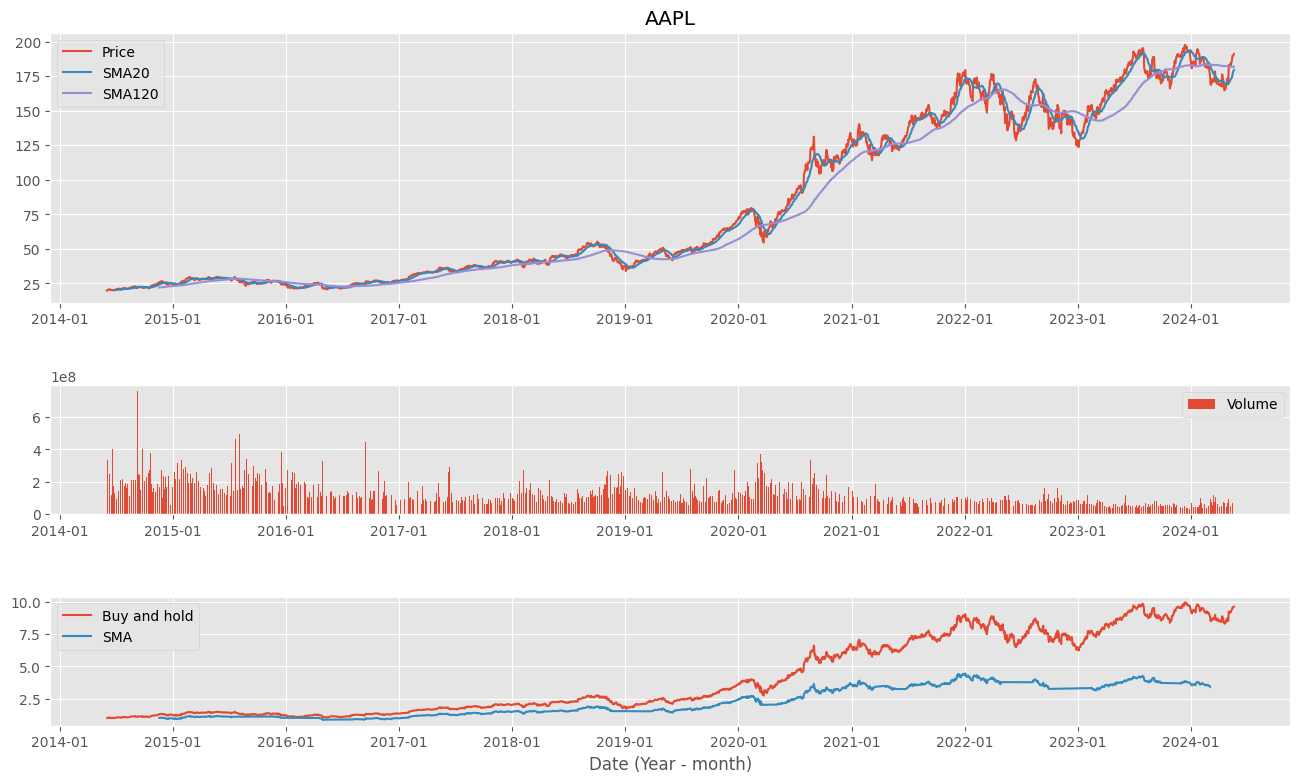

In [223]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')

ax2.bar(data.index, data['Volume'], label = 'Volume')
ax3.plot(data['Buy_and_hold'], label = 'Buy and hold')
ax3.plot(sma['Return'], label = 'SMA')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

In [224]:
data.tail()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA,rtn,Buy_and_hold
Date,,,,,,,,,
2024-05-14,187.429993,52393600,174.736253,181.770830,186.279999,1.006173,0,0.006173,9.437851
2024-05-15,189.720001,70400000,175.833630,181.767337,187.429993,1.012218,0,0.012218,9.553162
2024-05-16,189.839996,52845200,176.984943,181.759275,189.720001,1.000632,0,0.000632,9.559204
2024-05-17,189.869995,41282900,178.239618,181.762601,189.839996,1.000158,0,0.000158,9.560714
2024-05-20,191.039993,44361300,179.510850,181.777173,189.869995,1.006162,0,0.006162,9.619629


In [225]:
data['Buy_and_hold'].iloc[-1]

9.619628503227306

In [226]:
sma.tail()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA,Return,rtn
Date,,,,,,,,,
2024-02-27,182.382629,54318900,184.942583,183.356513,180.914627,1.008114,1,3.561173,0.008114
2024-02-28,181.174255,48953900,184.623997,183.348053,182.382629,0.993375,1,3.537578,-0.006625
2024-02-29,180.505173,136682600,184.453479,183.378426,181.174255,0.996307,1,3.524514,-0.003693
2024-03-01,179.416656,73488000,184.105857,183.394581,180.505173,0.993970,1,3.503259,-0.006030
2024-03-04,174.862823,81510100,183.580911,183.362992,179.416656,0.974619,1,3.414342,-0.025381


In [227]:
sma['Return'].iloc[-1]

3.4143421051378344

### Medie mobili esponenziali

__RICORDA__: la media mobile esponenziale è calcolata facendo in modo che i dati più recenti abbiano peso maggiore rispetto a quelli più vecchi; come suggerisce il nome, la distribuzione dei pesi (dai dati più vecchi ai più recenti) segue un andamento esponenziale.

https://www.investopedia.com/terms/e/ema.asp

https://capital.com/it/media-mobile-esponenziale#:~:text=Che%20cos'%C3%A8%20un%20indicatore%20di%20media%20mobile%20esponenziale%20(EMA)%3F,-La%20media%20mobile&text=%C3%88%20un%20tipo%20di%20media,resistenza%20per%20eseguire%20la%20negoziazione.

In [228]:
#data['Price_yesterday'] = data['Adj Close'].shift(1)
#data['Change'] = data['Adj Close'] / data['Price_yesterday']
data['EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean() # media mobile a 12 giorni (usa emw invece di rolling, questo perché usa una finestra esponenziale)
data['EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean() # media mobile a 26 giorni (usa emw invece di rolling, questo perché usa una finestra esponenziale)
data['Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]
ewm = data[data['Invested_EWM'] == 1].copy()
ewm['Price_yesterday'] = ewm['Adj Close'].shift(1)
ewm['Change'] = ewm['Adj Close'] / ewm['Price_yesterday']
ewm.loc[:,'Return'] = np.cumprod(ewm['Change'])

In [229]:
ewm.head()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA,rtn,Buy_and_hold,EWM12,EWM26,Invested_EWM,Return
Date,,,,,,,,,,,,,
2014-06-03,20.140232,292709200,NaN,NaN,NaN,NaN,0,0.014141,1.014141,19.902600,19.880197,1,NaN
2014-06-04,20.370216,335482000,NaN,NaN,20.140232,1.011419,0,0.011419,1.025722,19.974541,19.916495,1,1.011419
2014-06-05,20.450140,303805600,NaN,NaN,20.370216,1.003924,0,0.003924,1.029746,20.047710,19.956024,1,1.015388
2014-06-06,20.393906,349938400,NaN,NaN,20.450140,0.997250,0,-0.002750,1.026915,20.100971,19.988460,1,1.012595
2014-06-09,20.720234,301660000,NaN,NaN,20.393906,1.016001,0,0.016001,1.043347,20.196242,20.042665,1,1.028798


Vediamo il confronto tra le tre strategie.

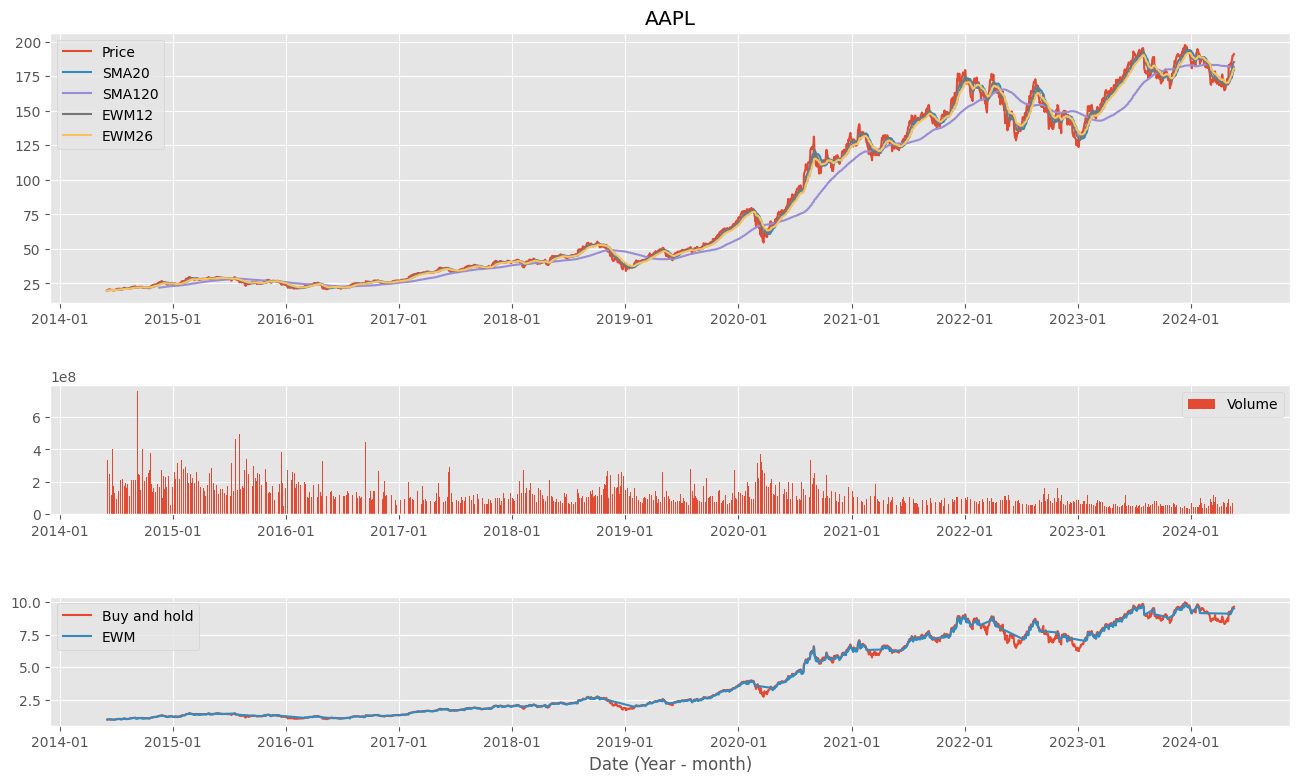

In [230]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')
ax1.plot(data['EWM12'], label = 'EWM12')
ax1.plot(data['EWM26'], label = 'EWM26')

ax2.bar(data.index, data['Volume'], label = 'Volume')
ax3.plot(data['Buy_and_hold'], label = 'Buy and hold')
#ax3.plot(sma['Return'], label = 'SMA')
ax3.plot(ewm['Return'], label ='EWM')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

Il rendimento della strategia basata sull'incrocio delle medie mobili esponenziali è più alto di quello della strategia buy-and-hold in assenza di costi di transazione: se questi vengono aggiunti però, ci si rende presto conto che la strategia basasta sull'incrocio delle medie mobili esponenziali è particolarmente costosa.<br>
Dal momento che la media mobile esponenziale è più reattiva rispetto a quella semplice, essa riesce a reagire meglio ai cambi di andamento e catturare con più precisione i trend in corso.

Il modello basato su media mobile esponenziale è quello standard nei sistemi di risk-management, proprio perché nella stima della volatilità da più peso ai valori più recenti.

### Simulazione con più titoli

In [231]:
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN'] # Apple, Coca-Cola, Microsoft, Tesla, Amazon
for ticker in tickers:
    data = yf.download(ticker, start, end, progress=False)
    #data = web.DataReader(ticker, 'yahoo', start, end)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data.loc[:,'SMA20'] = data['Adj Close'].rolling(20).mean() # media mobile semplice a 20 giorni
    data.loc[:,'SMA120'] = data['Adj Close'].rolling(120).mean() # media mobile semplice a 120 giorni
    data.loc[:,'EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean() # media mobile esponenziale a 12 giorni
    data.loc[:,'EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean() # media mobile esponenziale a 26 giorni
    data.loc[:,'Price_yesterday'] = data['Adj Close'].shift(1)
    data.loc[:,'Change'] = data['Adj Close'] / data['Price_yesterday']
    data.loc[:,'Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]
    data.loc[:,'Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]
    data.loc[:,'Buy_and_hold'] = np.cumprod(data['Change'])
    sma = data[data['Invested_SMA'] == 1].copy()
    sma.loc[:,'Return'] = np.cumprod(sma['Change'])
    ewm = data[data['Invested_EWM'] == 1].copy()
    ewm.loc[:,'Return'] = np.cumprod(ewm['Change'])
    print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'].iloc[-1]))
    print('SMA return: ' + ticker + ' ' + str(sma['Return'].iloc[-1]))
    print('EWM return: ' + ticker + ' ' + str(ewm['Return'].iloc[-1]))
    print('----------------------------')


Buy and hold strategy return: AAPL 9.619628503227306
SMA return: AAPL 3.4143421051378344
EWM return: AAPL 14.118728729794919
----------------------------
Buy and hold strategy return: KO 2.1035495775998023
SMA return: KO 1.1968009627228327
EWM return: KO 1.9388315647650447
----------------------------
Buy and hold strategy return: MSFT 12.249796231006934
SMA return: MSFT 4.790810345548563
EWM return: MSFT 10.527718798032645
----------------------------
Buy and hold strategy return: TSLA 12.819980366981023
SMA return: TSLA 4.458981395007409
EWM return: TSLA 70.67661569646165
----------------------------
Buy and hold strategy return: AMZN 11.885765358204381
SMA return: AMZN 6.271774908848906
EWM return: AMZN 20.29057994775993
----------------------------


### Relative Strength Index (RSI)

Il Relative Strength Index (RSI), o indice di forza relativa, è uno fra gli oscillatori più popolari dell'analisi tecnica e comunemente usati dai traders, in particolar modo da quelli che operano sui mercati dei futures.<br>
Fu ideato da John Welles Wilder, che lo pubblicò nel suo libro New Concepts in Technical Trading System nel 1978.

Si tratta di un indicatore di momentum, che riesce però ad ovviare ad alcuni problemi presenti nel momentum, nel Rate of change o in altri oscillatori di questo tipo.<br> Questi generano notevoli complicazioni nella loro interpretazione, soprattutto quando si verificano bruschi movimenti del mercato causandone un'improvvisa inversione della linea: è quindi necessario, per una corretta e più comprensibile analisi, minimizzare queste distorsioni.

Il Relative Stregth Index, oltre a risolvere questo problema, presenta una banda d'oscillazione costante, da 0 a 100, che permette una comparazione dei valori con alcuni livelli costanti prestabiliti.

__NOTA BENE:__ il termine "indice di forza relativa" è improprio, generando confusione anche in chi lo utilizza regolarmente: infatti, con "forza relativa" solitamente si intende un grafico lineare che mette in rapporto due differenti entità, come per esempio un'azione e il suo indice di appartenenza, due indici settoriali, una materia prima e un cambio monetario, ecc. <br>
L'indice ideato da Wilder non misura alcuna di queste correlazioni, traendo quindi in inganno.

Per la creazione di questo oscillatore è necessario stabilire un solo parametro, a differenza di altri, che ne richiedono due o più: in questo caso si tratta del numero di periodi che si vuole considerare. <br>
Wilder consigliava l'utilizzo di X = 14 periodi e la formula è la seguente:

$$ RSI = 100 \cdot \frac{U}{(U+D)} $$

dove
$ U $ è la media delle differenze di chiusura al rialzo di X giorni
$ D $ è la media del valore assoluto delle differenze di chiusura al ribasso di X giorni

Per individuare la media del valore rialzista bisogna sommare il totale delle differenze alla chiusura dei giorni di rialzo e dividere poi per i periodi considerati, mentre per quella ribassista bisogna sommare il numero totale dei valori assoluti delle differenze di chiusura durante giorni di ribasso e dividere sempre per il numero di periodi considerati. <br>
Ovviamente, come per tutti gli oscillatori, più si utilizzeranno periodi brevi, più si otterrà un oscillatore sensibile e con un'ampiezza maggiore, generando d'altra parte un maggior numero di falsi segnali.

Presentando una banda d'escursione costante, da 0 a 100, è possibile individuare zone fisse in cui l'oscillatore si trovi in una situazione di estremo; saranno quindi considerate zone di _ipercomprato_ quando l'oscillatore segnerà valori superiori a 70, mentre saremo in _ipervenduto_ qualora segnasse valori inferiori al 30 (valori consigliati dal suo ideatore).

Molto importanti e interessanti sono le divergenze rialziste o ribassiste in relazione al corso dei prezzi sul grafico: questi segnali sono da monitorare molto attentamente in quanto possono essere catalogati come situazioni assai pregnanti; lo stesso ideatore considerava le divergenze una caratteristica tra le più indicative di questo oscillatore.

Va comunque ricordato come un forte mercato generi prematuramente segnali di ipercomprato o ipervenduto e questo può portare a precipitose uscite da un trend ancora potenzialmente valido; infatti a volte le fasi di ipercomprato durante un mercato rialzista possono durare a lungo, come quelle di ipervenduto durante un mercato ribassista.

__PER CAPIRE__: se i mercati salgono può essere generato prematuramente un segnale di ipercomprato, anche se magari le cose stanno semplicemente andando bene.

Ulteriore sistema per identificare segnali di ingresso e uscita dal mercato grazie a questo oscillatore è mediante l'utilizzo delle linee di 30 e 70, che delimitano le situazioni di estremo. <br>
Nel caso per esempio di un mercato ribassista che venga a generare una situazione di ipervenduto, con l'oscillatore quindi ben al di sotto della linea del 30, potrebbe essere interessante prendere posizioni rialziste una volta che il valore si sia riportato al di sopra di tale livello; si tratterebbe di un'entrata con un discreto margine di rischio, ma che potrebbe rivelarsi ottimo e tempestivo ingresso in vista di un nuovo movimento rialzista.

Col passare del tempo, i Trader e gli Analisti si sono resi conto che l'oscillatore genera altri interessanti segnali di acquisto e di vendita, come doppi minimi e doppi massimi, testa e spalle, supporti e resistenze, anche quando non appaiono sul grafico.

__PER CAPIRE__:
Il Relative Strength Index è un indice che va da 0 a 100: se negli ultimi 14 giorni ho avuto solo rialzi si ha 100, se negli ultimi 14 giorni ho avuto solo ribassi si ha 0.<br>
Questo indice quindi serve a catturare la tendenza rialzista o ribassista del mercato.

In [232]:
#start = dt.datetime(2015, 1, 1)
#end = dt.datetime(2022,11,29)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN']
ticker = 'TSLA'
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])

[*********************100%%**********************]  1 of 1 completed


In [233]:
data['abs_change'] = data['Adj Close'].diff(1) # serie delle variazioni di prezzo
data['up'] = [1 if data.loc[i, 'abs_change'] >  0 else 0 for i in data.index] # serie dei movimenti in su (1 se il mercato è al rialzo)
data['down'] = [1 if data.loc[i, 'abs_change'] <  0 else 0 for i in data.index] # serie dei movimenti in giù (1 se il mercato è al ribasso)

In [234]:
data.head(20)

,Adj Close,Volume,abs_change,up,down
Date,,,,,
2014-06-02,13.646667,70021500,NaN,0,0
2014-06-03,13.662667,57912000,0.016001,1,0
2014-06-04,13.599333,51411000,-0.063334,0,1
2014-06-05,13.793333,60819000,0.194000,1,0
2014-06-06,13.878000,46107000,0.084667,1,0
2014-06-09,13.687333,42085500,-0.190667,0,1
2014-06-10,13.486667,52720500,-0.200666,0,1
2014-06-11,13.631333,59662500,0.144667,1,0
2014-06-12,13.568000,89905500,-0.063334,0,1


In [235]:
data['positive_movement'] = data['up'] * data['abs_change'] # calcola il numero di movimenti positivi
data['negative_movement'] = data['down'] * data['abs_change'] * - 1 # calcola il numero di movimenti negativi TODO: perché -1??

In [236]:
data.head(20)

,Adj Close,Volume,abs_change,up,down,positive_movement,negative_movement
Date,,,,,,,
2014-06-02,13.646667,70021500,NaN,0,0,NaN,NaN
2014-06-03,13.662667,57912000,0.016001,1,0,0.016001,-0.000000
2014-06-04,13.599333,51411000,-0.063334,0,1,-0.000000,0.063334
2014-06-05,13.793333,60819000,0.194000,1,0,0.194000,-0.000000
2014-06-06,13.878000,46107000,0.084667,1,0,0.084667,-0.000000
2014-06-09,13.687333,42085500,-0.190667,0,1,-0.000000,0.190667
2014-06-10,13.486667,52720500,-0.200666,0,1,-0.000000,0.200666
2014-06-11,13.631333,59662500,0.144667,1,0,0.144667,-0.000000
2014-06-12,13.568000,89905500,-0.063334,0,1,-0.000000,0.063334


In [237]:
data['avg_gain'] = data['positive_movement'].rolling(14).mean() # media mobile a 14 giorni dei movimenti positivi
data['avg_loss'] = data['negative_movement'].rolling(14).mean() # media mobile a 14 giorni dei movimenti negativi

In [238]:
data.head(20)

,Adj Close,Volume,abs_change,up,down,positive_movement,negative_movement,avg_gain,avg_loss
Date,,,,,,,,,
2014-06-02,13.646667,70021500,NaN,0,0,NaN,NaN,NaN,NaN
2014-06-03,13.662667,57912000,0.016001,1,0,0.016001,-0.000000,NaN,NaN
2014-06-04,13.599333,51411000,-0.063334,0,1,-0.000000,0.063334,NaN,NaN
2014-06-05,13.793333,60819000,0.194000,1,0,0.194000,-0.000000,NaN,NaN
2014-06-06,13.878000,46107000,0.084667,1,0,0.084667,-0.000000,NaN,NaN
2014-06-09,13.687333,42085500,-0.190667,0,1,-0.000000,0.190667,NaN,NaN
2014-06-10,13.486667,52720500,-0.200666,0,1,-0.000000,0.200666,NaN,NaN
2014-06-11,13.631333,59662500,0.144667,1,0,0.144667,-0.000000,NaN,NaN
2014-06-12,13.568000,89905500,-0.063334,0,1,-0.000000,0.063334,NaN,NaN


In [239]:
data['RS'] = data['avg_gain'] / data['avg_loss']
data['RSI'] = 100 - (100 / (1 + data['RS'])) # calcoliamo l'indice RSI con la formula

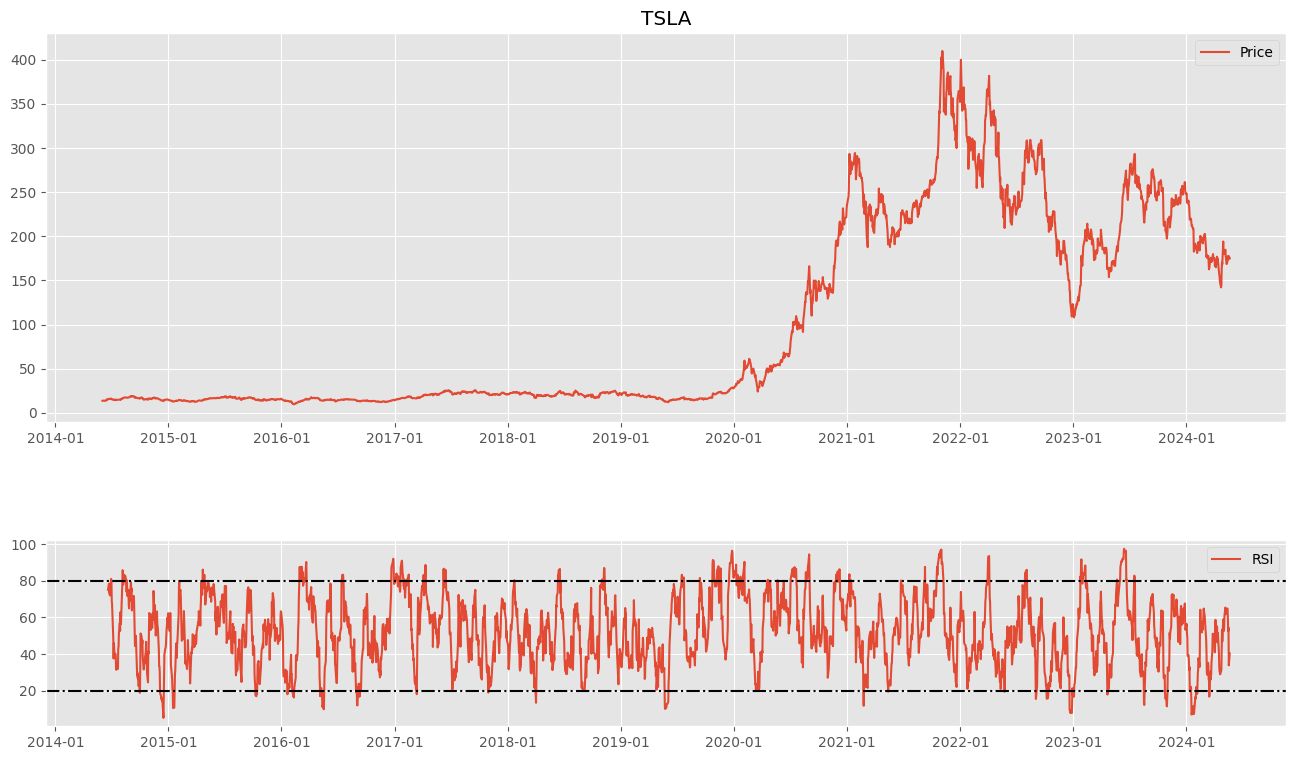

In [240]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax2.plot(data['RSI'], label = 'RSI')
ax2.axhline(80, linestyle = '-.', color = 'black')
ax2.axhline(20, linestyle = '-.', color = 'black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend()
ax2.legend()
plt.show()

#### RSI - Simulazione con più titoli

In [241]:
start = dt.datetime(2014, 5, 31)
end = dt.datetime(2024,5,21)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
results = pd.DataFrame(columns = ['Ticker', 'RSI'])


In [242]:
for ticker in tickers:
    print(ticker)
    data = yf.download(ticker, start, end, progress = False)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data['abs_change'] = data['Adj Close'].diff(1)
    data['up'] = [1 if data.loc[i, 'abs_change'] >  0 else 0 for i in data.index]
    data['down'] = [1 if data.loc[i, 'abs_change'] <  0 else 0 for i in data.index]
    data['positive_movement'] = data['up'] * data['abs_change']
    data['negative_movement'] = data['down'] * data['abs_change'] * - 1
    data['avg_gain'] = data['positive_movement'].rolling(14).mean()
    data['avg_loss'] = data['negative_movement'].rolling(14).mean()
    data['RS'] = data['avg_gain'] / data['avg_loss']
    data['RSI'] = 100 - (100 / (1 + data['RS']))
    print(data['RSI'].tail(1))
    print('--------------------------------------')
    
    #new_row = {'Ticker': ticker, 'RSI': data['RSI'][-1]}
    #results = results.append(new_row, ignore_index = True)
    

AAPL
Date
2024-05-20    86.262991
Name: RSI, dtype: float64
--------------------------------------
KO
Date
2024-05-20    62.269905
Name: RSI, dtype: float64
--------------------------------------
MSFT
Date
2024-05-20    84.716736
Name: RSI, dtype: float64
--------------------------------------
TSLA
Date
2024-05-20    40.307186
Name: RSI, dtype: float64
--------------------------------------
AMZN
Date
2024-05-20    66.998408
Name: RSI, dtype: float64
--------------------------------------
BAC
Date
2024-05-20    74.133327
Name: RSI, dtype: float64
--------------------------------------


### Bande di Bollinger

Le Bande di Bollinger sono un indicatore utilizzato per vedere se il prezzo di un titolo ha un comportamento insolitamente forte (al ribasso o al rialzo); il loro funzionamento si basa sulla volatilità del titolo (definita come deviazione standard).

Per calcolare le bande di Bollinger si usa dapprima una media mobile a G giorni (spesso 20) a cui viene aggiunto o sottratto il valore della deviazione standard moltiplicata per un determinato fattore F (spesso intorno a 2).

La banda superiore è quindi ottenuta aggiungendo alla media mobile F volte la deviazione standard, la banda centrale (se la si vuole visualizzare) è data dalla media mobile ed infine la banda inferiore è calcolata sottraendo alla media mobile F volte la deviazione standard.

Una maggiore ampiezza delle bande corrisponde a un'alta volatilità, una minore ampiezza corrisponde viceversa a una bassa volatilità. <br>
Bande convergenti rappresentano volatilità in diminuzione, bande divergenti rappresentano volatilità in aumento.

È possibile variare leggermente i parametri G ed F.<br>
I valori che secondo lo stesso Bollinger possono essere utilizzati sono i seguenti:

G = 20 e F = 2 Valido in generale;
G = 10 e F = 1.9 Se c'è la necessità di usare una media mobile molto corta;
G = 50 e F = 2.1 Se c'è la necessità di usare una media mobile molto lunga.
Lo stesso John Bollinger consiglia di non variare la lunghezza della Media Mobile (G) ma piuttosto di passare da barre daily a barre settimanali o mensili (per trading a lungo termine) o a barre di 1 ora o 5 minuti (per trading intraday).

Approssimativamente, dal punto di vista operativo, le bande di Bollinger danno segnali di acquisto e vendita quando si verificano le seguenti condizioni:
- quando il grafico del prezzo esce dalla banda superiore e successivamente vi rientra, si ottiene un segnale di vendita; questo corrisponde a un rapido aumento del prezzo e a un successivo rallentamento o aggiustamento;
- quando il grafico del prezzo esce dalla banda inferiore e successivamente vi rientra, si ottiene un segnale di acquisto; cioè il prezzo è calato molto velocemente fino ad arrestarsi e -probabilmente- a invertire il trend.

In realtà le bande di Bollinger da sole possono dare falsi segnali, in quanto per esempio il grafico potrebbe uscire in basso, rientrare e continuare il trend discendente: per questo motivo, John Bollinger consiglia di utilizzare altri indicatori, non correlati, per testare il comportamento delle bande; quando 2 o più indicatori confermano il comportamento delle bande, allora il segnale acquista significato (sempre nei limiti della relativa validità predittiva della Analisi Tecnica).

[*********************100%%**********************]  1 of 1 completed


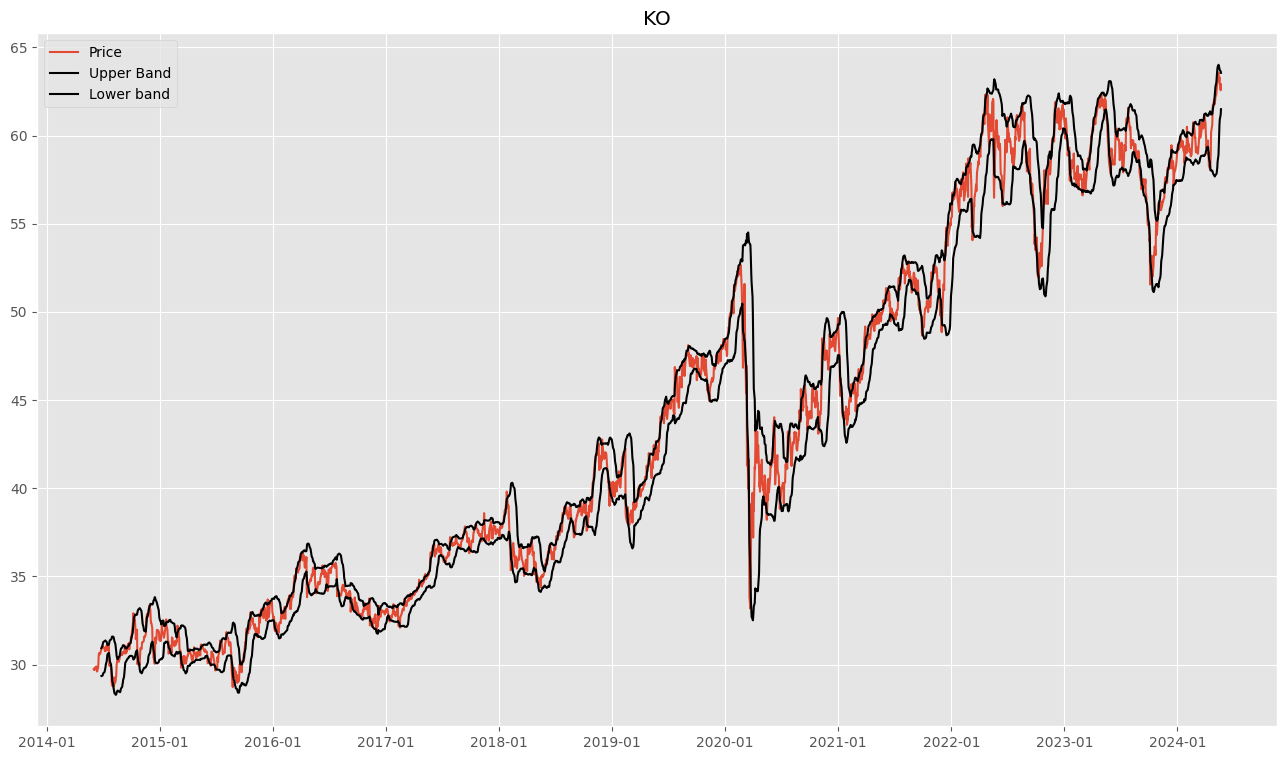

In [243]:
start = dt.datetime(2014, 5, 31)
end = dt.datetime(2024,5,22)
#tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
ticker = 'KO'
#results = pd.DataFrame(columns = ['Ticker', 'RSI'])
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
data['20_MA'] = data['Adj Close'].rolling(20).mean()
data['20_std'] = data['Adj Close'].rolling(20).std()
data['Upper_band'] = data['20_MA'] + 1.65 * data['20_std'] # media mobile a 20 giorni + 1.65 * deviazione standard degli ultimi 20 giorni
data['Lower_band'] = data['20_MA'] - 1.65 * data['20_std'] # media mobile a 20 giorni + 1.65 * deviazione standard degli ultimi 20 giorni
# 1.65 è l'area della distribuzione normale che contiene 2/3 delle osservazioni (circa)


plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((1,1), (0,0), rowspan = 1, colspan = 1, title = ticker)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['Upper_band'], label = 'Upper Band', color = 'black')
ax1.plot(data['Lower_band'], label = 'Lower band', color = 'black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax1.legend()
plt.show()         

Coca-Cola è un titolo non molto volatile, perché i suoi prezzi rimangono quasi sempre dentro alle bande di Bollinger (come si può notare dal grafico); bisogna però tenere conto del fatto che un forte spostamento di prezzo nel titolo causa anche il conseguente allargamento delle bande, quindi è normale che quasi sempre i prezzi restino dentro al range. <br>
Se si prova a guardare il grafico di Tesla, si può notare che spesso il prezzo rimbalza tra l'estremo superiore e quello inferiore della banda, talvolta trascinando le bande al rialzo o al ribasso: infatti Tesla è molto volatile.

[*********************100%%**********************]  1 of 1 completed


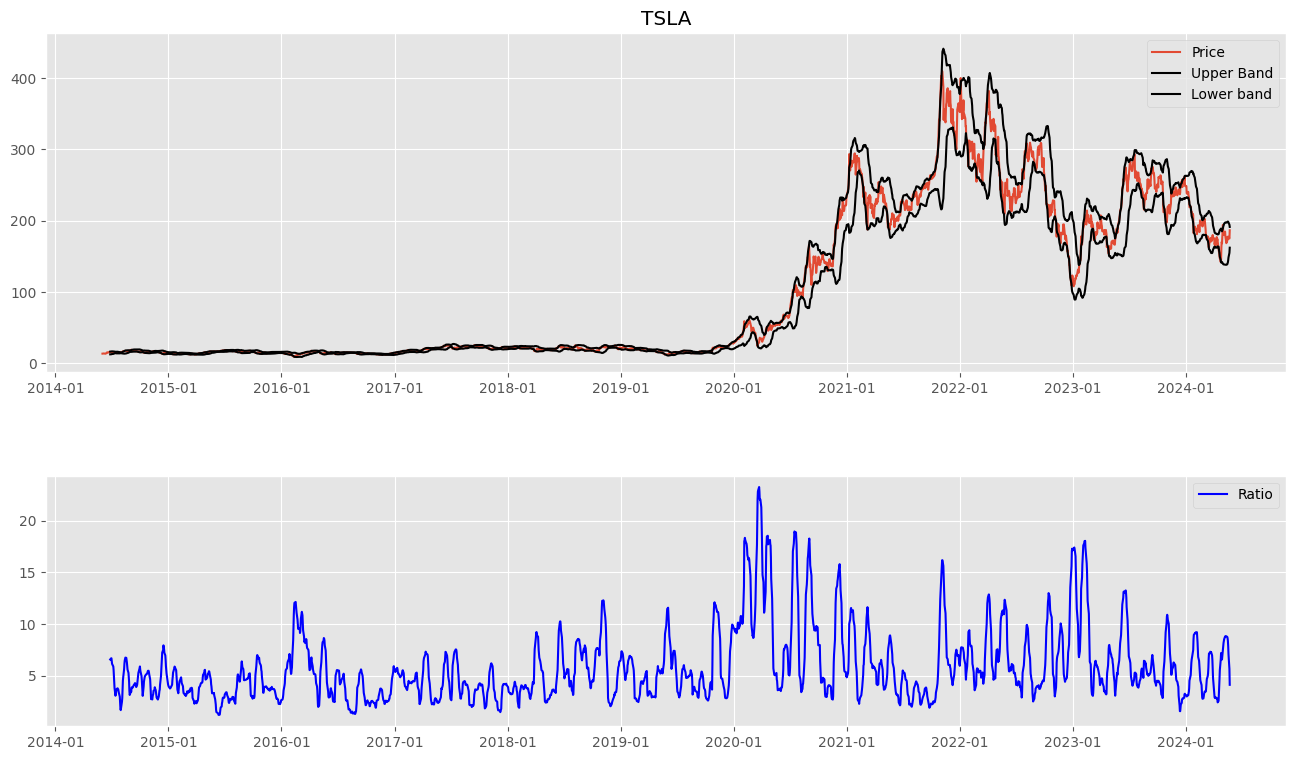

In [244]:
start = dt.datetime(2014, 5, 31)
end = dt.datetime(2024,5,22)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
ticker = 'TSLA'
results = pd.DataFrame(columns = ['Ticker', 'RSI'])
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
data['20_MA'] = data['Adj Close'].rolling(20).mean()
data['20_std'] = data['Adj Close'].rolling(20).std()
data['Upper_band'] = data['20_MA'] + 2 * data['20_std']
data['Lower_band'] = data['20_MA'] - 2 * data['20_std']
data['Ratio'] = data['20_std'] / data['20_MA'] * 100 # misura della volatilità


plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['Upper_band'], label = 'Upper Band', color = 'black')
ax1.plot(data['Lower_band'], label = 'Lower band', color = 'black')
ax2.plot(data['Ratio'], label = 'Ratio', color = 'blue')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
plt.show()         

Una misura di volatilità (visualizzata dal secondo grafico posto qui sopra) è il rapporto (percentuale) tra la volatilità degli ultimi 20 giorni e la media mobile degli ultimi 20 giorni: è anch'esso un indicatore utilizzato per dare segnali di acquisto o vendita.

Misuriamo il ratio su più titoli - Uno "screener"

In [245]:
import datetime as dt
import yfinance as yf
import pandas as pd

start = dt.datetime(2015, 1, 1)
end = dt.datetime(2021, 11, 26)
tickers = ['^GSPC', 'AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN', 'BAC']

results = []

for ticker in tickers:
    data = yf.download(ticker, start, end)
    data = data[['Adj Close']].copy()
    data['20_MA'] = data['Adj Close'].rolling(20).mean()
    data['20_std'] = data['Adj Close'].rolling(20).std()
    data['Ratio'] = data['20_std'] / data['20_MA'] * 100

    if not data['Ratio'].isna().all():
        latest_ratio = data['Ratio'].iloc[-1]
        if pd.notna(latest_ratio):
            results.append({'Ticker': ticker, 'Ratio': latest_ratio})

results_df = pd.DataFrame(results)
print(results_df)

# ATTENZIONE: QUESTO CODICE È STATO MODIFICATO CON CHAT-GPT PER RIMUOVERE I WARNING

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  Ticker     Ratio
0  ^GSPC  0.739524
1   AAPL  3.121420
2     KO  0.886654
3   MSFT  1.373588
4   TSLA  6.057613
5   AMZN  2.944710
6    BAC  1.452903


I valori prodotti rappresentano il rapporto tra la volatilità dei rendimenti e la media mobile dei rendimenti negli ultimi 20 giorni.

__NB__: la volatilità dell'indice è enormemente inferiore alla volatilità delle sue componenti.

### MACD con "Signal line" - 2

Torniamo a parlare di strategie di trading basate sull'utilizzo di medie mobili.
Oltre alla strategia basata sull'incrocio delle medie mobili, c'è anche un altro modo di generare segnali di trading: l'idea è quella di sottrarre alla media mobile a breve termine (generalmente una media mobile esponenziale a 12 giorni) il valore della media mobile a lungo termine (generalmente una media mobile esponenziale a 26 giorni); la nuova linea che ha origine a partire da questi valori prende il nome di _MACD line_, mentre la media mobile esponenziale (generalmente a 9 giorni) di questa nuova linea prende il nome di _signal line_.

__PER CAPIRE:__ la MACD line è data dalla differenza delle due medie mobili, mentre la signal line è la media mobile della differenza delle due medie mobili.

Quando la MACD line taglia dal basso all'alto la signal line allora viene generato un segnale di acquisto, mentre invece quando la MACD line taglia dall'alto al basso la signal line allora viene generato un segnale di vendita.

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [247]:
start = dt.datetime(2022, 5, 31)
end = dt.datetime(2024,5, 21)
ticker = 'AAPL'
data = yf.download(ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [248]:
exp1 = data['Close'].ewm(span=12, adjust = False).mean() # media mobile esponenziale a 12 giorni
exp2 = data['Close'].ewm(span=26, adjust = False).mean() # media mobile esponenziale a 26 giorni

In [249]:
data['MACD'] = exp1 - exp2 # differenza tra la media mobile breve e quella lunga
data['Signal line'] = data['MACD'].ewm(span=9, adjust = False).mean() # media mobile a 9 giorni della MACD line

In [250]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
Date,,,,,,,,
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600,3.865564,2.238890
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000,4.292488,2.649610
2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200,4.587628,3.037214
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900,4.768976,3.383566
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300,4.950043,3.696861


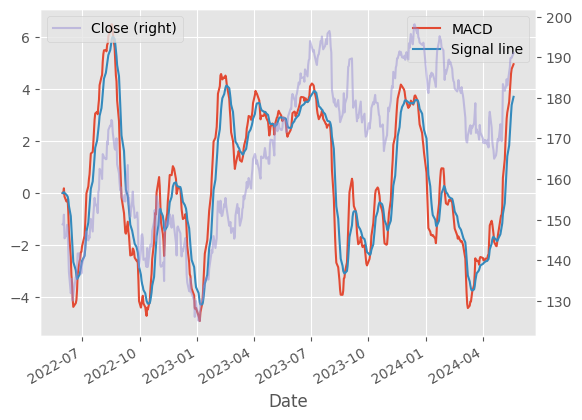

In [251]:
%matplotlib inline
fig, ax = plt.subplots()
data[['MACD', 'Signal line']].plot(ax=ax)
data['Close'].plot(ax = ax, alpha = 0.50, secondary_y = True)
plt.legend();

### Stocastic Oscillator

A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0–100 bounded range of values.
The Formula for the Stochastic Oscillator Is
\begin{aligned} &\text{\%K}=\left(\frac{\text{C} - \text{L14}}{\text{H14} - \text{L14}}\right)\times100\\ &\textbf{where:}\\ &\text{C = The most recent closing price}\\ &\text{L14 = The lowest price traded of the 14 previous}\\ &\text{trading sessions}\\ &\text{H14 = The highest price traded during the same}\\ &\text{14-day period}\\ &\text{\%K = The current value of the stochastic indicator}\\ \end{aligned} 
  
%K=( H14−L14
C−L14
 )×100
where:
C = The most recent closing price
L14 = The lowest price traded of the 14 previous
trading sessions
H14 = The highest price traded during the same
14-day period
%K = The current value of the stochastic indicator
​
 
﻿

Notably, %K is referred to sometimes as the fast stochastic indicator. The "slow" stochastic indicator is taken as %D = 3-period moving average of %K.

The general theory serving as the foundation for this indicator is that in a market trending upward, prices will close near the high, and in a market trending downward, prices close near the low. Transaction signals are created when the %K crosses through a three-period moving average, which is called the %D.

The difference between the slow and fast Stochastic Oscillator is the Slow %K incorporates a %K slowing period of 3 that controls the internal smoothing of %K. Setting the smoothing period to 1 is equivalent to plotting the Fast Stochastic Oscillator.1﻿

What Does the Stochastic Oscillator Tell You?
The stochastic oscillator is range-bound, meaning it is always between 0 and 100. This makes it a useful indicator of overbought and oversold conditions. Traditionally, readings over 80 are considered in the overbought range, and readings under 20 are considered oversold. However, these are not always indicative of impending reversal; very strong trends can maintain overbought or oversold conditions for an extended period. Instead, traders should look to changes in the stochastic oscillator for clues about future trend shifts.

Stochastic oscillator charting generally consists of two lines: one reflecting the actual value of the oscillator for each session, and one reflecting its three-day simple moving average. Because price is thought to follow momentum, the intersection of these two lines is considered to be a signal that a reversal may be in the works, as it indicates a large shift in momentum from day to day.

Divergence between the stochastic oscillator and trending price action is also seen as an important reversal signal. For example, when a bearish trend reaches a new lower low, but the oscillator prints a higher low, it may be an indicator that bears are exhausting their momentum and a bullish reversal is brewing.



In [252]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14) * 100 / (high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [253]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600,3.865564,2.238890,95.682333,91.289166
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000,4.292488,2.649610,95.682484,95.813153
2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200,4.587628,3.037214,94.270080,95.211632
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900,4.768976,3.383566,94.406500,94.786355
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300,4.950043,3.696861,96.142021,94.939534


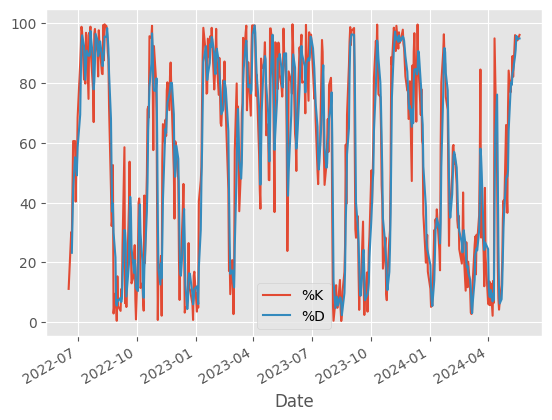

In [254]:
fig, ax = plt.subplots()
data[['%K', '%D']].plot(ax=ax);

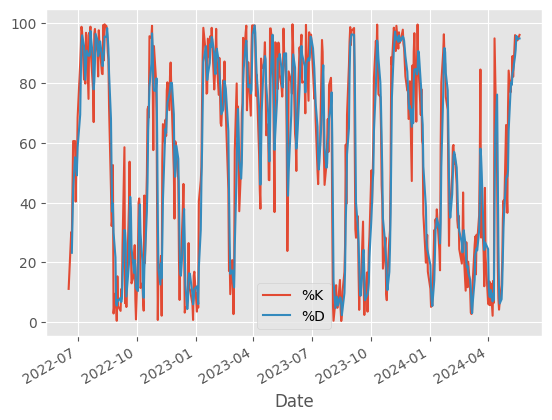

In [255]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-03-31':].plot(ax=ax);


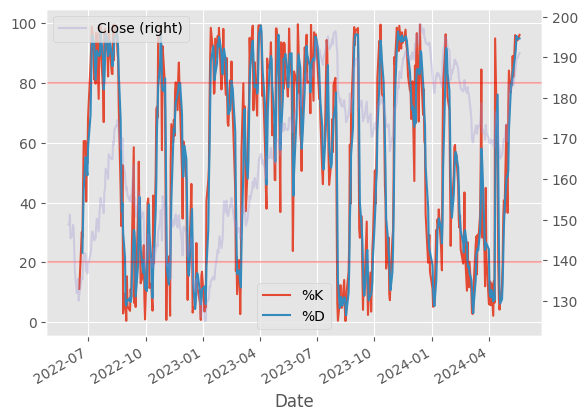

In [256]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-03-31':].plot(ax=ax)
ax.axhline(80, c = 'r', alpha = 0.3)
ax.axhline(20, c='r', alpha = 0.3)
data['Close'].loc['2021-03-31':].plot(ax=ax, alpha = 0.3, secondary_y = True)
plt.legend();